# Chapter 3 - Linear Regression

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# importing data
df = pd.read_csv('synth_temp.csv')

In [3]:
# checking data
df.head()

,Region,Year,RgnAvTemp
0,A,1841,12.557395
1,B,1841,13.267048
2,E,1841,12.217463
3,F,1841,13.189420
4,A,1842,13.462887


In [4]:
# For our purposes, we don't want to use all this data
print('There are ' + str(len(df.loc[df['Year'] == 1841])) + ' points in 1841\n' +
      'and ' + str(len(df.loc[df['Year'] == 2010])) + ' points in 2010\n' +
      'and ' + str(len(df.loc[df['Year'] == 1902])) + ' points in 1902')

There are 4 points in 1841
and 12 points in 2010
and 12 points in 1902


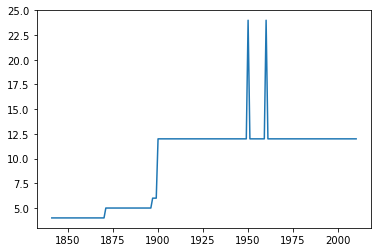

In [5]:
# seeing there are different numbers of points
fig, ax = plt.subplots()
ax.plot(df['Year'].unique(),
        [len(df.loc[df['Year'] == i]) 
         for i in df['Year'].unique()])
plt.show()

In [6]:
# Let's slice the DataFrame to remove all rows through 1901, as we can see that there is much less data in those years
df = df.loc[df.Year > 1901]
df.head()

,Region,Year,RgnAvTemp
292,A,1902,17.021583
293,B,1902,17.590253
294,C,1902,17.493082
295,D,1902,18.706166
296,E,1902,17.390903


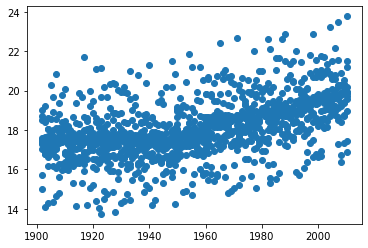

In [7]:
# Make a quick plot to visualize the data
fig, ax = plt.subplots()
ax.scatter(df.Year, df.RgnAvTemp)
plt.show()

In [8]:
# Group the data by year and use the agg method of the DataFrame to create annual averages
df_group_year = (df.groupby(['Year']).agg('mean').rename(columns = {'RgnAvTemp' : 'AvgTemp'}))
print(df_group_year.head())
print(df_group_year.tail())

        AvgTemp
Year           
1902  17.385044
1903  17.222163
1904  17.217215
1905  17.817502
1906  17.386445
        AvgTemp
Year           
2006  19.904999
2007  19.820224
2008  19.245558
2009  19.537290
2010  19.919115


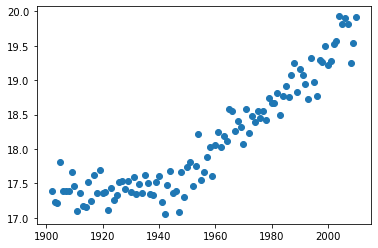

In [9]:
# visualize result of averaging over each year
fig, ax = plt.subplots()
ax.scatter(df_group_year.index, df_group_year['AvgTemp'])
plt.show()

In [10]:
# Computing the values for a moving average signal for the temperature measurements using a window of 10 years
window = 10
smoothed_df = pd.DataFrame(df_group_year.AvgTemp.rolling(window).mean())
smoothed_df.colums = 'AvgTemp'
print(smoothed_df.head(14))
print(smoothed_df.tail())

        AvgTemp
Year           
1902        NaN
1903        NaN
1904        NaN
1905        NaN
1906        NaN
1907        NaN
1908        NaN
1909        NaN
1910        NaN
1911  17.401761
1912  17.398872
1913  17.394177
1914  17.388443
1915  17.358825
        AvgTemp
Year           
2006  19.531170
2007  19.583102
2008  19.581256
2009  19.584580
2010  19.654919


In [11]:
# filter out the NaN values
smoothed_df = smoothed_df[smoothed_df['AvgTemp'].notnull()]

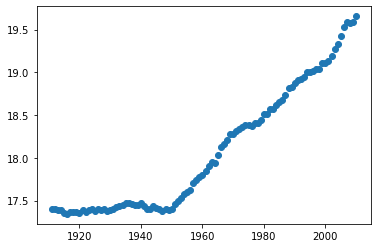

In [12]:
# quick plot to understand what we have so far
fig, ax = plt.subplots()
ax.scatter(smoothed_df.index, smoothed_df['AvgTemp'])
plt.show()

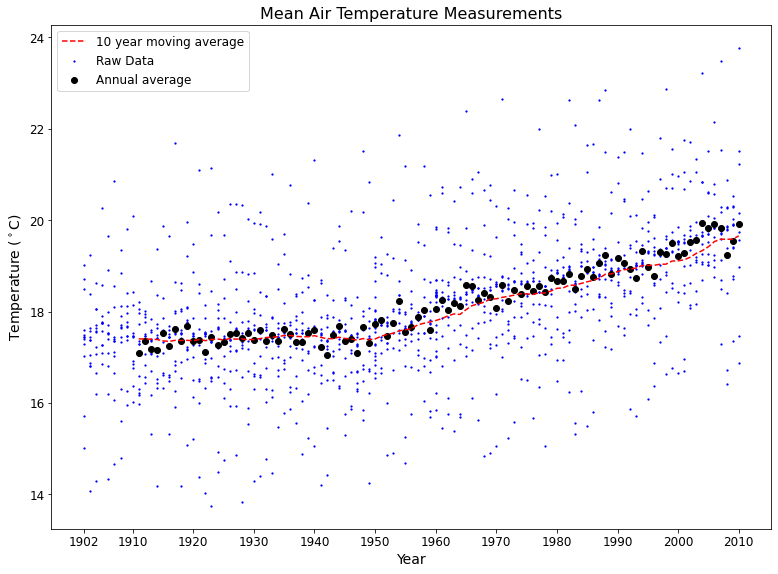

In [13]:
# ploting the measurements by year along with the moving average signal
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', c = 'blue',
           s = 1.5)
# Annual averages
annual_plot_data = df_group_year.filter(items = smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, 
           annual_plot_data.AvgTemp, 
           label = 'Annual average', c = 'k')
# Moving averages
ax.plot(smoothed_df.index, 
        smoothed_df.AvgTemp, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} year moving average')
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
             fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

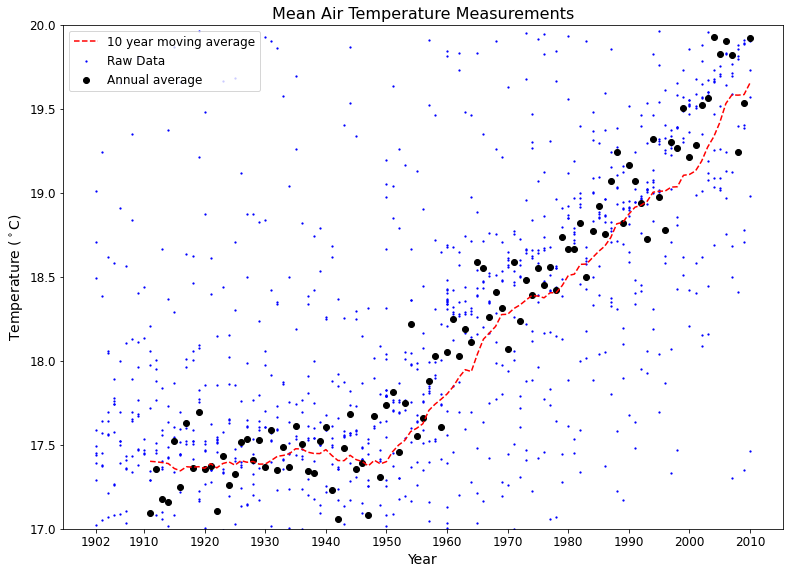

In [14]:
# improving the plot by focusing on the part we are most interested in
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', c = 'blue',
           s = 1.5)
# Annual averages
annual_plot_data = df_group_year.filter(items = smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, 
           annual_plot_data.AvgTemp, 
           label = 'Annual average', c = 'k')
# Moving averages
ax.plot(smoothed_df.index, 
        smoothed_df.AvgTemp, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} year moving average')
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
             fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
             fontsize = 14)
ax.set_ylim(17, 20)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

In [15]:
# Import the LinearRegression class from the linear_model module of scikit-learn
from sklearn.linear_model import LinearRegression

In [16]:
# Instantiate the LinearRegression class
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_group_year.index.values.reshape((-1, 1)),
                 df_group_year.AvgTemp)
print('model slope = ', linear_model.coef_[0])
print('model intercept = ', linear_model.intercept_)
r2 = linear_model.score(df_group_year.index.values.reshape((-1, 1)),
                 df_group_year.AvgTemp)
print('r squared = ', r2)

model slope =  0.023522370249706537
model intercept =  -27.88736502793287
r squared =  0.8438499294671093


In [17]:
# generating prediction
pred_X = df_group_year.index
pred_Y = linear_model.predict(df_group_year.index.values.reshape((-1, 1)))

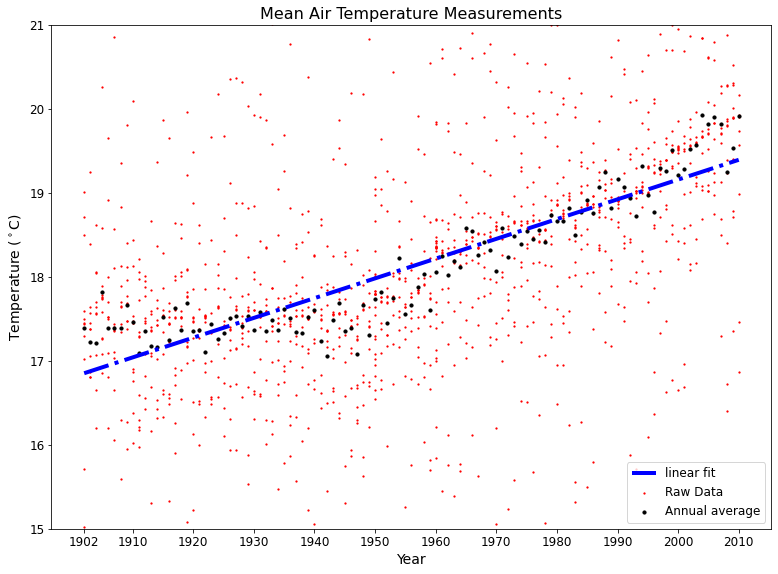

In [18]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red',
           s = 1.5)
# Annual averages
ax.scatter(df_group_year.index, 
           df_group_year.AvgTemp, 
           label = 'Annual average', 
           c = 'k',
           s = 10)
# linear fit
ax.plot(pred_X, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
             fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
             fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

In [19]:
# roll up by year
df_group_year = df.groupby(['Year', 'Region']).agg({'RgnAvTemp':'mean'})
# note that the .droplevel() method removes the multiindex 
# added by the .agg() method() to make things simpler
# later on in our analysis
print(df_group_year.head(12))
print(df_group_year.tail(12))

             RgnAvTemp
Year Region           
1902 A       17.021583
     B       17.590253
     C       17.493082
     D       18.706166
     E       17.390903
     F       17.438122
     G       18.494440
     H       15.708989
     I       19.012183
     J       17.292191
     K       15.020913
     L       17.451698
             RgnAvTemp
Year Region           
2010 A       19.732301
     B       20.161722
     C       19.922963
     D       21.221710
     E       19.571958
     F       19.903760
     G       21.511489
     H       16.867440
     I       23.772483
     J       18.982479
     K       17.462226
     L       19.918854


In [20]:
# add the region column so we can use that for dummy variables
df_group_year['Region'] = df_group_year.index.get_level_values(1)
# add the Year column so we can use that in a model
df_group_year['Year'] = df_group_year.index.get_level_values(0)
# reset the index on the long axis
df_group_year = df_group_year.droplevel(0, axis = 0)
df_group_year = df_group_year.reset_index(drop = True)

Let's look at the overall average temperatures for each region

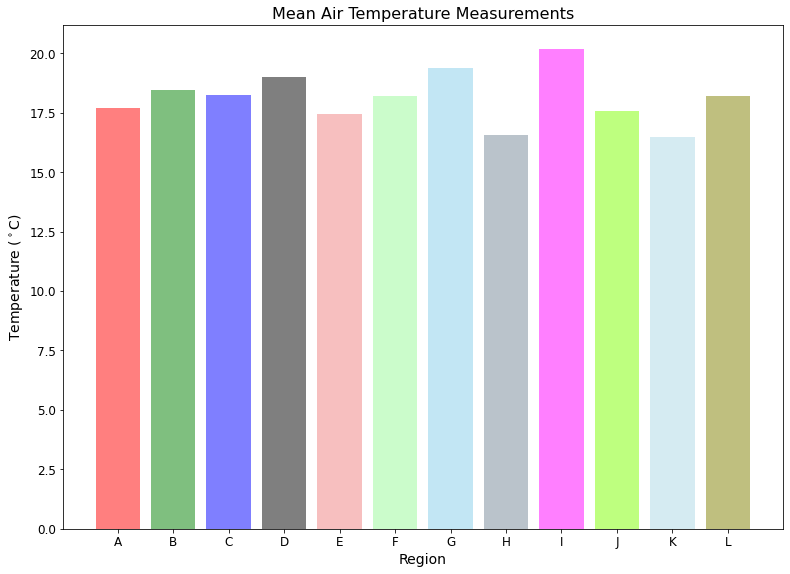

In [21]:
region_temps = df_group_year.groupby('Region').agg({'RgnAvTemp':'mean'})
colors = ['red', 'green', 'blue', 'black', 'lightcoral', 'palegreen',
          'skyblue', 'lightslategray', 'magenta', 'chartreuse', 'lightblue',
          'olive']
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])
ax.bar(region_temps.index, 
       region_temps.RgnAvTemp, 
       color = colors,
       alpha = 0.5)
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Region', 
             fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
             fontsize = 14)
ax.tick_params(labelsize = 12)
plt.show()

<b> we will create dummy variables from the Region column </b>

In [22]:
dummy_cols = pd.get_dummies(df_group_year.Region, drop_first=True)
df_group_year = pd.concat([df_group_year, dummy_cols], axis=1)
print(df_group_year.head())
print(df_group_year.tail())

   RgnAvTemp Region  Year  B  C  D  E  F  G  H  I  J  K  L
0  17.021583      A  1902  0  0  0  0  0  0  0  0  0  0  0
1  17.590253      B  1902  1  0  0  0  0  0  0  0  0  0  0
2  17.493082      C  1902  0  1  0  0  0  0  0  0  0  0  0
3  18.706166      D  1902  0  0  1  0  0  0  0  0  0  0  0
4  17.390903      E  1902  0  0  0  1  0  0  0  0  0  0  0
      RgnAvTemp Region  Year  B  C  D  E  F  G  H  I  J  K  L
1303  16.867440      H  2010  0  0  0  0  0  0  1  0  0  0  0
1304  23.772483      I  2010  0  0  0  0  0  0  0  1  0  0  0
1305  18.982479      J  2010  0  0  0  0  0  0  0  0  1  0  0
1306  17.462226      K  2010  0  0  0  0  0  0  0  0  0  1  0
1307  19.918854      L  2010  0  0  0  0  0  0  0  0  0  0  1


In [23]:
# We now create a linear model, as before, using the Year column and all the dummy columns
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_group_year.loc[:, 'Year':'L'],
                 df_group_year.RgnAvTemp)
r2 = linear_model.score(df_group_year.loc[:, 'Year':'L'],
                 df_group_year.RgnAvTemp)
print('r squared ', r2)

r squared  0.7778768442731825


In [24]:
# construct data to predict from model
pred_X = df_group_year.drop(['RgnAvTemp', 'Region'], axis = 1)
pred_Y = linear_model.predict(pred_X.values)
preds = pd.concat([df_group_year.RgnAvTemp, 
                   df_group_year.Region,
                   pred_X,  pd.Series(pred_Y)], axis = 1)
preds.rename(columns = {0 : 'pred_temp'}, inplace = True)
print(preds.head())

   RgnAvTemp Region  Year  B  C  D  E  F  G  H  I  J  K  L  pred_temp
0  17.021583      A  1902  0  0  0  0  0  0  0  0  0  0  0  16.441468
1  17.590253      B  1902  1  0  0  0  0  0  0  0  0  0  0  17.188189
2  17.493082      C  1902  0  1  0  0  0  0  0  0  0  0  0  16.977391
3  18.706166      D  1902  0  0  1  0  0  0  0  0  0  0  0  17.732365
4  17.390903      E  1902  0  0  0  1  0  0  0  0  0  0  0  16.195227


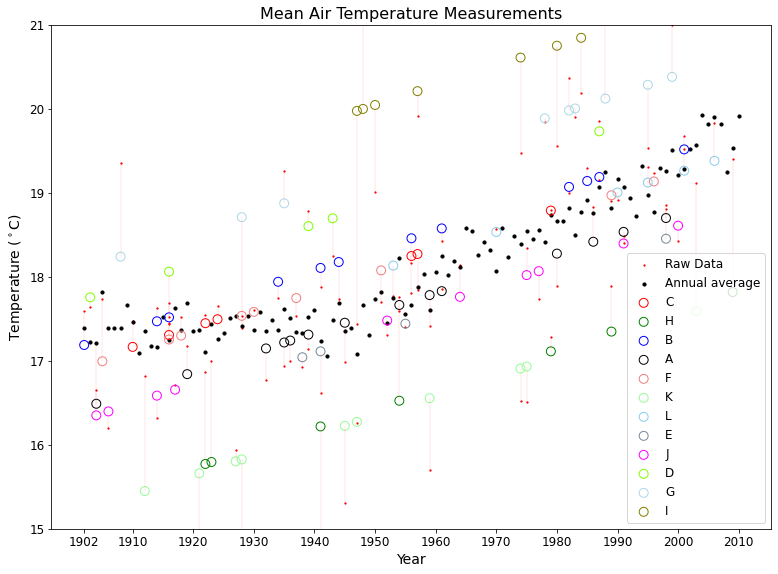

In [25]:
plot_data = preds.sample(n = 100)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])
# Raw data
raw_plot_data = plot_data
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red', 
           s = 1.5)
# Annual averages
annual_plot_data = df_group_year.groupby('Year').agg('mean')
ax.scatter(annual_plot_data.index, 
           annual_plot_data.RgnAvTemp, 
           label = 'Annual average', 
           c = 'k',
           s = 10)

fit_data = plot_data
for i in range(len(plot_data.Region.unique())):
    region = plot_data.Region.unique()[i]
    plot_region = fit_data.loc[fit_data.Region == region, :]
    ax.scatter(plot_region.Year,
               plot_region.pred_temp, 
               edgecolor = colors[i],
               facecolor = "none",
               s = 80,
               label = region)
# draw faint lines connecting the raw to the predicted
for i in fit_data.index:
    ax.plot([fit_data.Year[i], fit_data.Year[i]],
            [fit_data.pred_temp[i], fit_data.RgnAvTemp[i]],
            '-',
            linewidth = 0.1,
            c = "red")
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

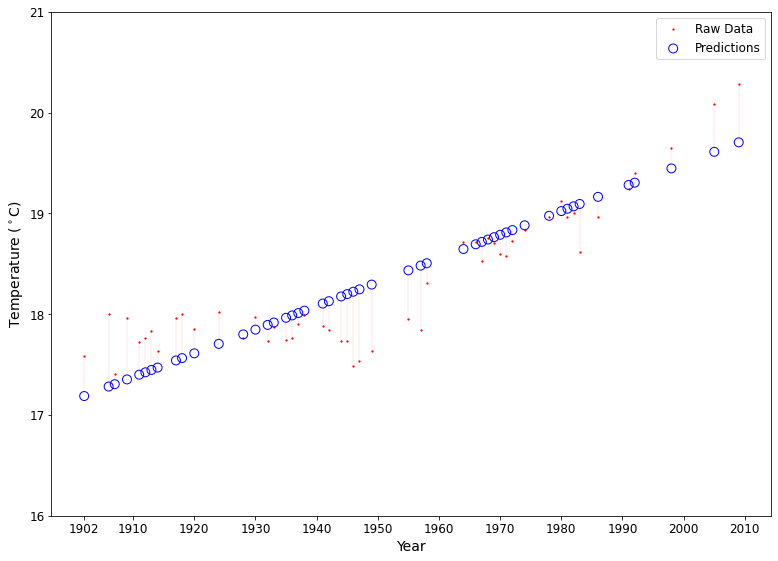

In [26]:
# Let's plot just one region to get a feel for how well the model works
region_B = preds.loc[preds.B == 1, :]
np.random.seed(42)
plot_data = region_B.sample(n = 50) 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])
# Raw data
ax.scatter(plot_data.Year, 
           plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red', 
           s = 1.5)
ax.scatter(plot_data.Year,
           plot_data.pred_temp,
           label = "Predictions",
           facecolor = "none",
           edgecolor = "blue",
           s = 80)
for i in plot_data.index:
    ax.plot([plot_data.Year[i], plot_data.Year[i]],
            [plot_data.pred_temp[i], plot_data.RgnAvTemp[i]],
            '-',
            linewidth = 0.1,
            c = "red")
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(16, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

In [27]:
#  add the Year column using the index, and then calculate a Year2 column by raising the Year column to the power of 2
#df_group_year['Year'] = df_group_year.index
df_group_year = df_group_year.rename(columns = {'RgnAvTemp' : 'AvTemp'})
# add a Year**2 column to build a polynomial model of degree 2
df_group_year['Year2'] = df_group_year['Year']**2
print(df_group_year.head())
print(df_group_year.tail())

      AvTemp Region  Year  B  C  D  E  F  G  H  I  J  K  L    Year2
0  17.021583      A  1902  0  0  0  0  0  0  0  0  0  0  0  3617604
1  17.590253      B  1902  1  0  0  0  0  0  0  0  0  0  0  3617604
2  17.493082      C  1902  0  1  0  0  0  0  0  0  0  0  0  3617604
3  18.706166      D  1902  0  0  1  0  0  0  0  0  0  0  0  3617604
4  17.390903      E  1902  0  0  0  1  0  0  0  0  0  0  0  3617604
         AvTemp Region  Year  B  C  D  E  F  G  H  I  J  K  L    Year2
1303  16.867440      H  2010  0  0  0  0  0  0  1  0  0  0  0  4040100
1304  23.772483      I  2010  0  0  0  0  0  0  0  1  0  0  0  4040100
1305  18.982479      J  2010  0  0  0  0  0  0  0  0  1  0  0  4040100
1306  17.462226      K  2010  0  0  0  0  0  0  0  0  0  1  0  4040100
1307  19.918854      L  2010  0  0  0  0  0  0  0  0  0  0  1  4040100


In [28]:
# Fit the data to the model
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_group_year.loc[:, ['Year', 'Year2']], df_group_year.AvTemp)
print('model coefficients = ', linear_model.coef_)
print('model intercept = ', linear_model.intercept_)
r2 = linear_model.score(df_group_year.loc[:, ['Year', 'Year2']], df_group_year.AvTemp)
print('r squared = ', r2)

model coefficients =  [-1.02981369e+00  2.69257683e-04]
model intercept =  1002.0087338444181
r squared =  0.2925297566363806


In [29]:
# let's visualize the results to see whether it is a more reasonable fit
pred_X = df_group_year.loc[:, ['Year', 'Year2']]
pred_Y = linear_model.predict(pred_X)
# generate predictions for the next 10 years
pred_X_future = pd.DataFrame(
    list(range(2011, 2021))).rename(columns = {0 : 'Year'})
pred_X_future['Year2'] = pred_X_future['Year']**2
pred_Y_future = linear_model.predict(pred_X_future)

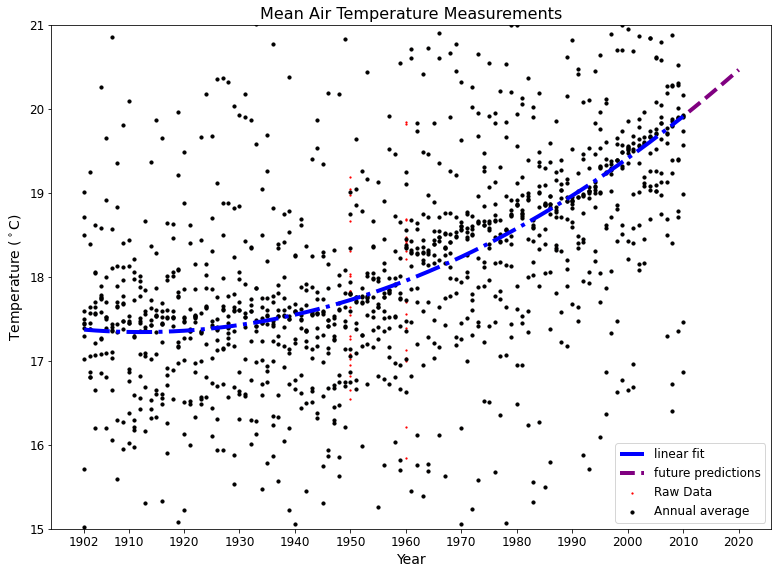

In [30]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
# Raw data
raw_plot_data = df
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red',
           s = 1.5)
# Annual averages
ax.scatter(df_group_year.Year, 
           df_group_year.AvTemp, 
           label = 'Annual average', 
           c = 'k',
           s = 10)
# linear fit
ax.plot(pred_X.Year, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')
ax.plot(pred_X_future.Year, pred_Y_future,
        c = "purple",
        linestyle = '--',
        linewidth = 4,
        label = 'future predictions')
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2021, 10))
ax.set_xlabel('Year', 
             fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

### Load the data and carry out preprocessing through to the point where Day_of_Year is added

In [31]:
df = pd.read_csv('austin_weather.csv')

In [32]:
# seelcting the columns of interest
df = df[['Date', 'TempAvgF']]

In [33]:
# adding Year, Month and Day columns
df['Year'] = pd.DatetimeIndex(df.loc[:, 'Date']).year
df['Month'] = pd.DatetimeIndex(df.loc[:, 'Date']).month
df['Day'] = pd.DatetimeIndex(df.loc[:, 'Date']).day

In [34]:
#creating a 20 day moving average
window = 20
df['MA_20d'] = df.TempAvgF.rolling(window).mean()

In [35]:
# selecting the 2015 year
df_one_year = df.loc[df.Year == 2015].reset_index()
df_one_year['Day_of_Year'] = df_one_year.index + 1

In [36]:
# Add a column for the sine of Day_of_Year and another for the cosine of Day_of_Year
df_one_year['sine_day'] = np.sin(2 * np.pi * df_one_year['Day_of_Year'] / 365)
df_one_year['cossine_day'] = np.cos(2 * np.pi * df_one_year['Day_of_Year'] / 365)

In [37]:
df_one_year

,index,Date,TempAvgF,Year,Month,Day,MA_20d,Day_of_Year,sine_day,cossine_day
0,376,2015-01-01,37,2015,1,1,52.70,1,1.721336e-02,0.999852
1,377,2015-01-02,41,2015,1,2,51.50,2,3.442161e-02,0.999407
2,378,2015-01-03,51,2015,1,3,50.65,3,5.161967e-02,0.998667
3,379,2015-01-04,43,2015,1,4,49.65,4,6.880243e-02,0.997630
4,380,2015-01-05,41,2015,1,5,48.95,5,8.596480e-02,0.996298
...,...,...,...,...,...,...,...,...,...,...
360,736,2015-12-27,55,2015,12,27,61.10,361,-6.880243e-02,0.997630
361,737,2015-12-28,41,2015,12,28,60.20,362,-5.161967e-02,0.998667
362,738,2015-12-29,43,2015,12,29,59.25,363,-3.442161e-02,0.999407
363,739,2015-12-30,49,2015,12,30,58.45,364,-1.721336e-02,0.999852


### Perform a linear regression of the average temperature versus the Day_of_Year and the sine and cosine features

In [38]:
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_one_year[['Day_of_Year', 'sine_day', 'cossine_day']], df_one_year['TempAvgF'])

LinearRegression()

In [39]:
# Printing the parameters of the model and the r2 score.
print('model coefficients: ', linear_model.coef_)
print('model intercept: ', linear_model.intercept_)
print('r squared: ', linear_model.score(
    df_one_year[['Day_of_Year', 'sine_day', 'cossine_day']], df_one_year['TempAvgF'])
     )

model coefficients:  [ 1.46396364e-02 -5.57332499e+00 -1.67824174e+01]
model intercept:  67.43327530313066
r squared:  0.779745650129063


In [40]:
# Generating predictions using the new features
y_pred = linear_model.predict(df_one_year[['Day_of_Year', 'sine_day', 'cossine_day']])
x_pred = df_one_year.Day_of_Year

### Visualizing the raw data and the new model

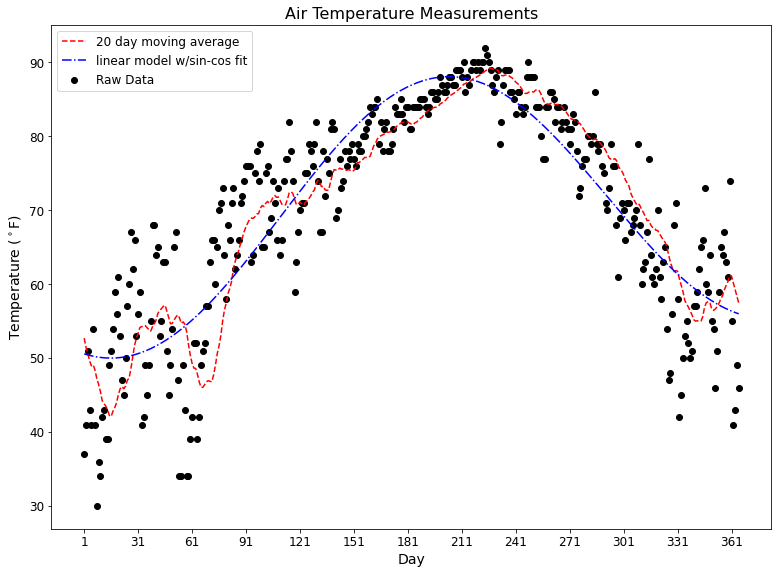

In [41]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])
# Raw data
ax.scatter(df_one_year.Day_of_Year, 
           df_one_year.TempAvgF, 
           label = 'Raw Data', c = 'k')
# Moving averages
ax.plot(df_one_year.Day_of_Year,
        df_one_year['MA_20d'], 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} day moving average')
# regression predictions
ax.plot(x_pred, y_pred,
        c = "blue",
        linestyle = '-.',
        label = 'linear model w/sin-cos fit')
ax.set_title('Air Temperature Measurements',
             fontsize = 16)
ax.set_xlabel('Day', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$F)', 
              fontsize = 14)
ax.set_xticks(range(df_one_year.Day_of_Year.min(), 
                    df_one_year.Day_of_Year.max(), 
                    30))
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12,
          loc = 'upper left')
plt.show()

### In this exercise, we will use the scikit-learn module SGDRegressor, which utilizes stochastic gradient descent to train models.

In [42]:
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [43]:
# Write a function to define our linear model
def h_x(Beta, X):
    return np.dot(Beta, X).flatten()

In [44]:
# write a function to evaluate the cost function
def J_beta(pred, true):
    return np.mean((pred - true) ** 2)

In [45]:
# write the function to update the parameters
def update(pred, true, X, gamma):
    return gamma * np.sum((true - pred) * X, axis = 1)

In [46]:
# Load the data and carry out the same preprocessing and scaling
df = pd.read_csv('synth_temp.csv')
df = df.loc[df.Year > 1901]

In [47]:
# grouping by year
df_group_year = df.groupby(['Year']).agg({'RgnAvTemp':'mean'})

In [48]:
# adding the Year column
df_group_year['Year'] = df_group_year.index
# df_group_year = df_group_year.rename(columns = {'RgnAvTemp':'AvTemp'})

In [49]:
# scale the data
X_min = df_group_year.Year.min()
X_range = df_group_year.Year.max() - X_min

Y_min = df_group_year.RgnAvTemp.min()
Y_range = df_group_year.RgnAvTemp.max() - Y_min

X_scale = (df_group_year.Year - X_min) / X_range

In [50]:
train_X = pd.DataFrame({'X0' : np.ones(df_group_year.shape[0]), 'X1' : X_scale}).transpose()
train_Y = (df_group_year.RgnAvTemp - Y_min / Y_range).ravel()

In [51]:
print(train_X.iloc[:, :5])
print(train_Y[:5])

Year  1902      1903      1904      1905      1906
X0     1.0  1.000000  1.000000  1.000000  1.000000
X1     0.0  0.009259  0.018519  0.027778  0.037037
[11.45220403 11.28932368 11.28437502 11.88466262 11.4536052 ]


### Creating the model

In [52]:
np.random.seed(42)
Beta = np.random.randn(2).reshape((1, 2)) * 0.1
print('initial Beta\n', Beta)

initial Beta
 [[ 0.04967142 -0.01382643]]


In [53]:
# set the learning rate (gamma) and the maximum number of times that we will go through the training cycle (epochs)
gamma = 0.0005
max_epochs = 100

In [54]:
# Make an initial prediction and calculate the error that prediction
y_pred = h_x(Beta, train_X)
print('Initial cost J(Beta) = ' + str(J_beta(y_pred, train_Y)))

Initial cost J(Beta) = 148.19970068513288


In [55]:
# use a loop to iterate through the training
epochs = []
costs = []
for epoch in range(max_epochs):
    Beta += update(y_pred, train_Y, train_X, gamma)
    y_pred = h_x(Beta, train_X)
    cost = J_beta(y_pred, train_Y)
    if epoch % 10 == 0:
        print('New cost J(Beta) = ' + str(round(cost, 3)) + ' at epoch ' + str(epoch))    
    epochs.append(epoch)
    costs.append(cost)

New cost J(Beta) = 128.509 at epoch 0
New cost J(Beta) = 31.147 at epoch 10
New cost J(Beta) = 7.87 at epoch 20
New cost J(Beta) = 2.286 at epoch 30
New cost J(Beta) = 0.929 at epoch 40
New cost J(Beta) = 0.584 at epoch 50
New cost J(Beta) = 0.481 at epoch 60
New cost J(Beta) = 0.438 at epoch 70
New cost J(Beta) = 0.41 at epoch 80
New cost J(Beta) = 0.388 at epoch 90


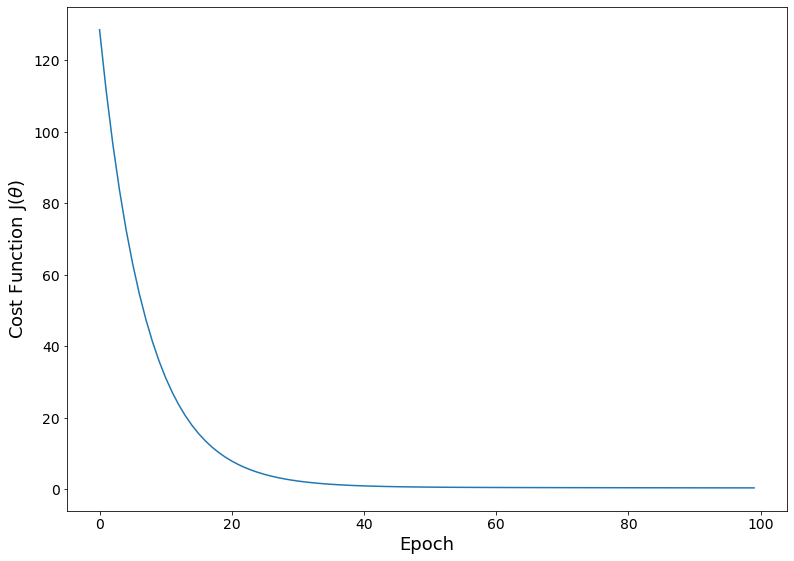

In [56]:
# Visualize the training history
# plot training history
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(epochs, costs)
ax.tick_params(labelsize = 14)
ax.set_ylabel('Cost Function J(' + r'$\theta$' + ')', fontsize = 18)
ax.set_xlabel('Epoch', fontsize = 18)
plt.show()

In [57]:
# Use the r2_score function from sklearn.metrics
r2 = r2_score(train_Y, y_pred)
print('r squared = ', r2)

r squared =  0.43114800075758075


In [58]:
# generate predictions
pred_X = train_X
# make predictions
pred_Y = h_x(Beta, pred_X)

In [59]:
# scale predictions back to real values
pred_Y = (pred_Y * Y_range) + Y_min
# replace the X with the original values
pred_X = df_group_year['Year']

In [60]:
# scale the coefficients back to real values
Beta0 = (Y_min + Y_range * Beta[0, 0] - Y_range * Beta[0, 1] * X_min / X_range)
Beta1 = Y_range * Beta[0, 1] / X_range

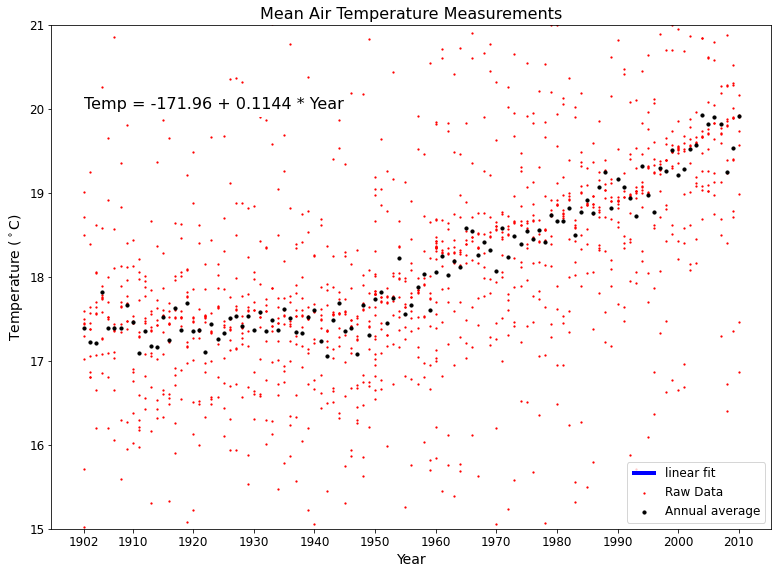

In [61]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])
# Raw data
raw_plot_data = df
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red',
           s = 1.5)
# Annual averages
ax.scatter(df_group_year.Year, 
           df_group_year.RgnAvTemp, 
           label = 'Annual average', 
           c = 'k',
           s = 10)
# linear fit
ax.plot(pred_X, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')
ax.text(1902, 20,
        'Temp = ' + 
        str(round(Beta0, 2)) +
        ' + ' +
        str(round(Beta1, 4)) +
        ' * Year',
        fontsize = 16,
        backgroundcolor = 'white')
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
             fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
             fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

In [62]:
# Let's use the same df_group_year and do scaling again
# scale the data
X_min = df_group_year.Year.min()
X_range = df_group_year.Year.max() - X_min

Y_min = df_group_year.RgnAvTemp.min()
Y_range = df_group_year.RgnAvTemp.max() - Y_min

scale_X = (df_group_year.Year - X_min) / X_range

train_X = scale_X.ravel()
train_Y = ((df_group_year.RgnAvTemp - Y_min) / Y_range).ravel()

In [63]:
# create the model object
np.random.seed(42)
model = SGDRegressor(
    loss = 'squared_loss',
    max_iter = 100,
    learning_rate = 'constant',
    eta0 = 0.0005,
    tol = 0.00009,
    penalty = 'none')

In [64]:
# fit the model
model.fit(train_X.reshape((-1, 1)), train_Y)

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=100,
             penalty='none', tol=9e-05)

In [65]:
# retrieving the model coefficients and rescale them as in the previous exercise so that we can compare the results
Beta0 = (Y_min + Y_range * model.intercept_[0] - Y_range * model.coef_[0] * X_min / X_range)
Beta1 = Y_range * model.coef_[0] / X_range
print(Beta0)
print(Beta1)

-0.5798539884018439
0.009587734834970016


In [66]:
# generate predictions
pred_X = df_group_year['Year']
pred_Y = model.predict(train_X.reshape((-1, 1)))

In [67]:
# calculate the r squared value
r2 = r2_score(train_Y, pred_Y)
print('r squared = ', r2)

r squared =  0.5436475116024911


In [68]:
# scale predictions back to real values
pred_Y = (pred_Y * Y_range) + Y_min

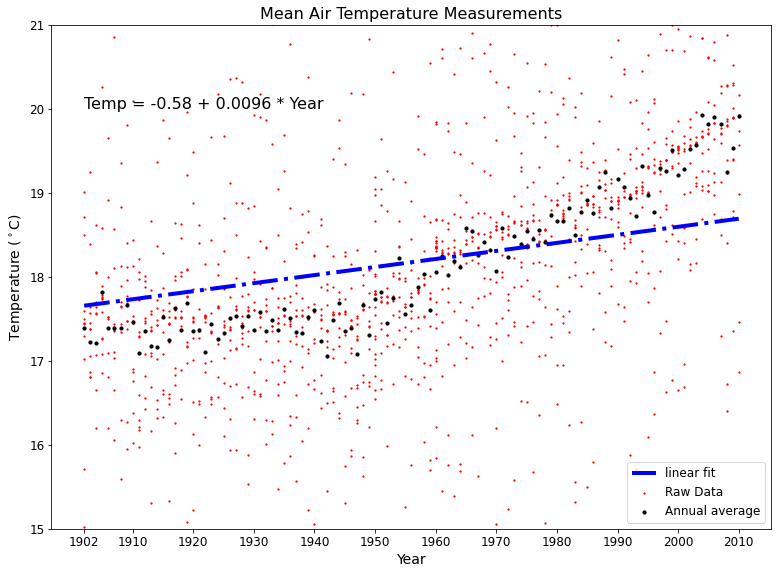

In [69]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1])
# Raw data
raw_plot_data = df
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red',
           s = 1.5)
# Annual averages
ax.scatter(df_group_year.Year, 
           df_group_year.RgnAvTemp, 
           label = 'Annual average', 
           c = 'k',
           s = 10)
# linear fit
ax.plot(pred_X, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')
# put the model on the plot
ax.text(1902, 20, 'Temp = ' + str(round(Beta0, 2)) + ' + ' + str(round(Beta1, 4)) + ' * Year',
        fontsize = 16)
ax.set_title('Mean Air Temperature Measurements',
            fontsize = 16)
# make the ticks include the first and last years
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

from the description file https://archive.ics.uci.edu/ml/machine-learning-databases/00294/ the variables are:

note: some var names are incorrect in the description file

Ambient Temperature (AT) <br>
Ambient Pressure (AP) <br>
Relative Humidity (RH) <br>
Exhaust Vacuum (V) <br>
The dependent variable is net hourly electrical energy output (PE)

In [70]:
# load data
power_data = pd.read_csv('combined_cycle_power_plant.csv')
print(power_data.shape)

(9568, 5)


In [71]:
# inspect data
power_data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [72]:
# searching for missing data
missings = power_data.isnull().sum()
missings

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [73]:
# seeing the correlation
corr = power_data.corr()

mask = np.ones((power_data.shape[1], power_data.shape[1]))

mask = [[1 if j<i else 0
        for j in range(corr.shape[0])]
        for i in range(corr.shape[1])]

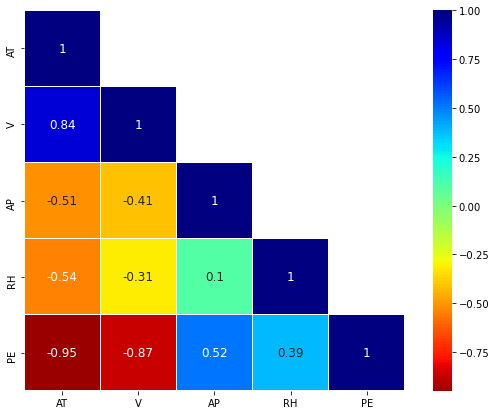

In [74]:
fig, ax = plt.subplots(figsize = (10, 7))
# blanking out the upper triangle (duplicates)
sns.heatmap(corr, cmap = 'jet_r',
            square = True, 
            linewidths = 0.5, 
            center = 0, 
            annot = True, 
            mask = mask, 
            annot_kws = {"size" : 12}, 
            xticklabels = power_data.columns, 
            yticklabels = power_data.columns)
plt.show()

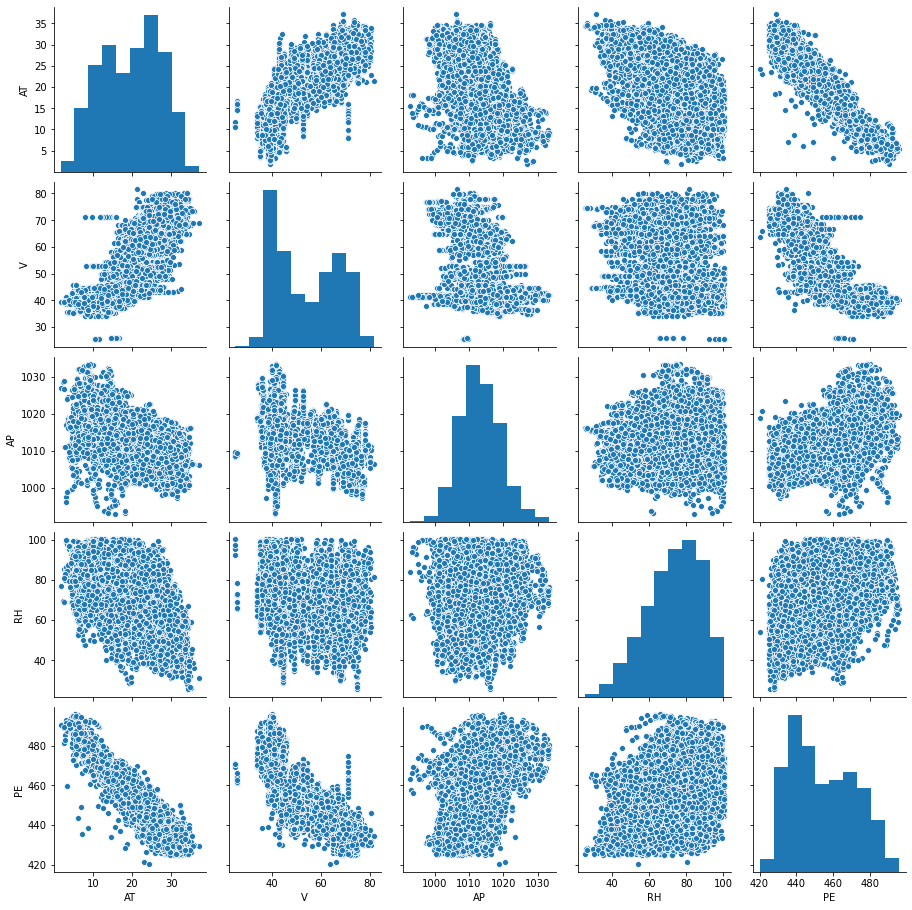

In [75]:
# look at the pairwise variable relationships
plot_grid = sns.pairplot(power_data)

In [76]:
# creating train and test data
X_train = power_data.drop('PE', axis = 1)
y_train = power_data['PE']

In [77]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
# make predictions
y_pred = model.predict(X_train)

In [79]:
# calculate r squared
r2 = model.score(X_train, y_train)
print('model coefficients ' + str(model.coef_))
print('r squared value ' + str(round(r2, 3)))

model coefficients [-1.97751311 -0.23391642  0.06208294 -0.1580541 ]
r squared value 0.929


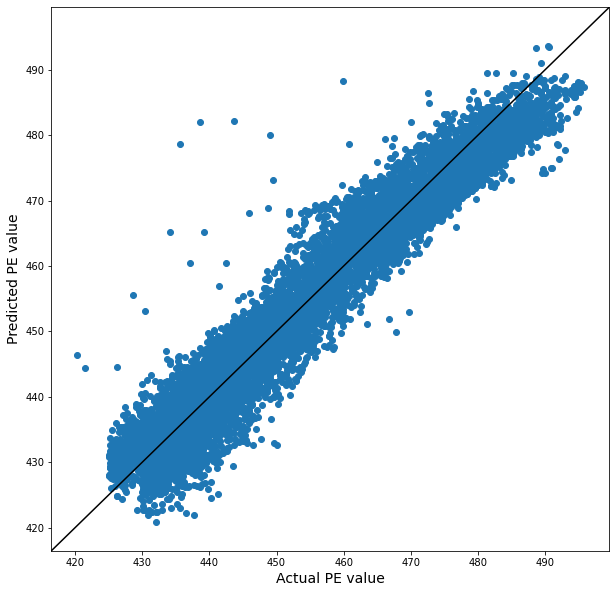

In [80]:
# plot the predicted value against the true value
fig, ax = plt.subplots(figsize=(10, 10))
# set some limits
PE_range = max(power_data.PE) - min(power_data.PE)
plot_range = [min(power_data.PE) - 0.05 * PE_range, max(power_data.PE) + 0.05 * PE_range]
ax.scatter(y_train, y_pred)
ax.set_xlim(plot_range)
ax.set_ylim(plot_range)
ax.set_xlabel('Actual PE value', fontsize = 14)
ax.set_ylabel('Predicted PE value', fontsize = 14)
ax.plot(plot_range, plot_range, c = "black")
plt.show()